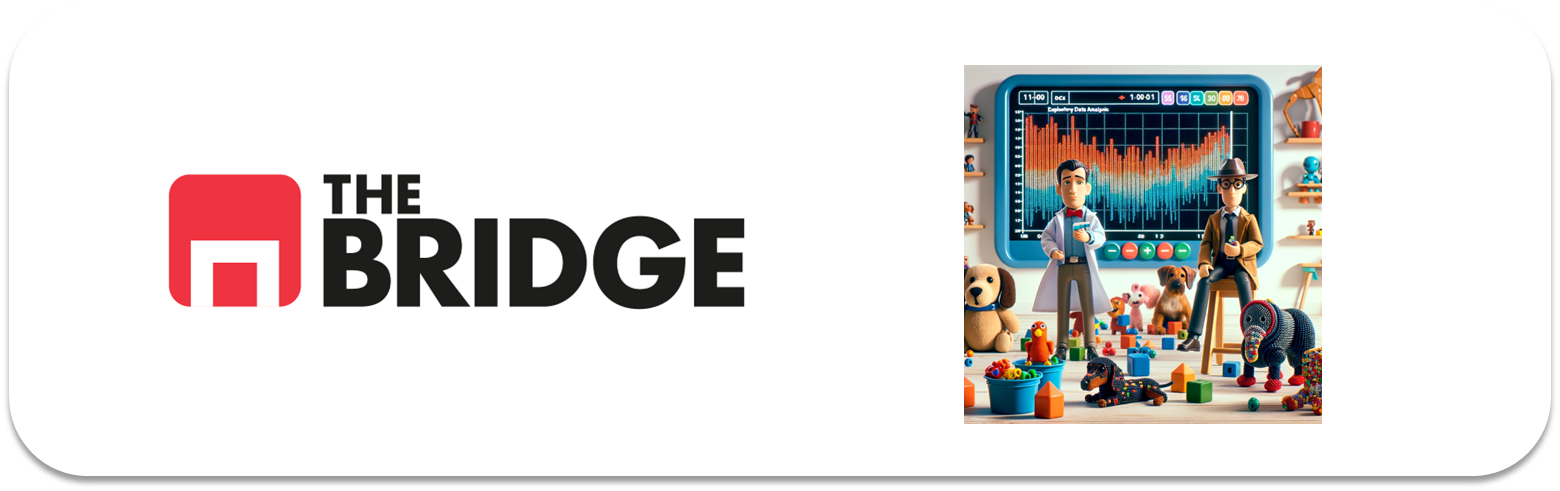

## PRACTICA OBLIGATORIA: **Análisis Multivariante**

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot

pd.options.mode.copy_on_write = True

## #1: Titanic

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic = df_titanic.drop(columns = ["deck", "survived", "pclass", "embarked"])

In [4]:
df_titanic.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male',
       'embark_town', 'alive', 'alone'],
      dtype='object')

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [5]:
df_titanic["family_members"] = df_titanic["parch"] + df_titanic["sibsp"]
df_titanic = df_titanic.drop(columns = ["parch", "sibsp"])

In [6]:
df_titanic

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [7]:
moda_embark_town = df_titanic["embark_town"].mode()[0]
df_titanic["embark_town"] = df_titanic["embark_town"].fillna(moda_embark_town)

In [8]:
df_titanic.isna().sum()

sex                 0
age               177
fare                0
class               0
who                 0
adult_male          0
embark_town         0
alive               0
alone               0
family_members      0
dtype: int64

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [9]:
df_titanic.groupby(["who"], observed = True)["age"].mean()

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [12]:
es_woman = df_titanic.who == "woman"
es_man = df_titanic.who == "man"
es_child = df_titanic.who == "child"

media_woman = df_titanic.loc[es_woman, "age"].mean()
media_man = df_titanic.loc[es_man, "age"].mean()
media_child = df_titanic.loc[es_child, "age"].mean()

es_age_nulo = df_titanic.age.isna()

df_titanic.loc[es_woman & es_age_nulo, "age"] = media_woman
df_titanic.loc[es_man & es_age_nulo, "age"] = media_man
df_titanic.loc[es_child & es_age_nulo, "age"] = media_child

In [13]:
df_titanic.isna().sum()

sex               0
age               0
fare              0
class             0
who               0
adult_male        0
embark_town       0
alive             0
alone             0
family_members    0
dtype: int64

<Axes: >

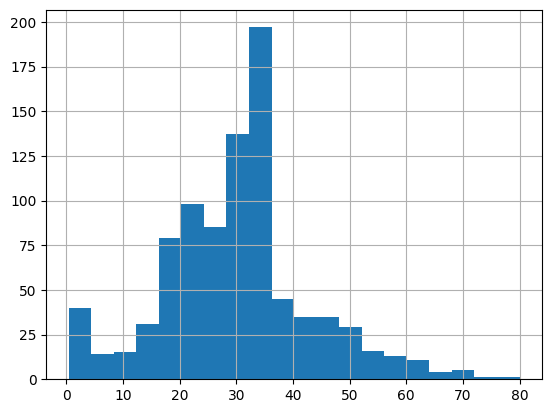

In [14]:
df_titanic["age"].hist(bins=20)

### #1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [18]:
columnas_categoricas = ["alive", "who", "class", "embark_town", "alone", "sex", "family_members"]
columnas_numericas = ["age", "fare"]

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

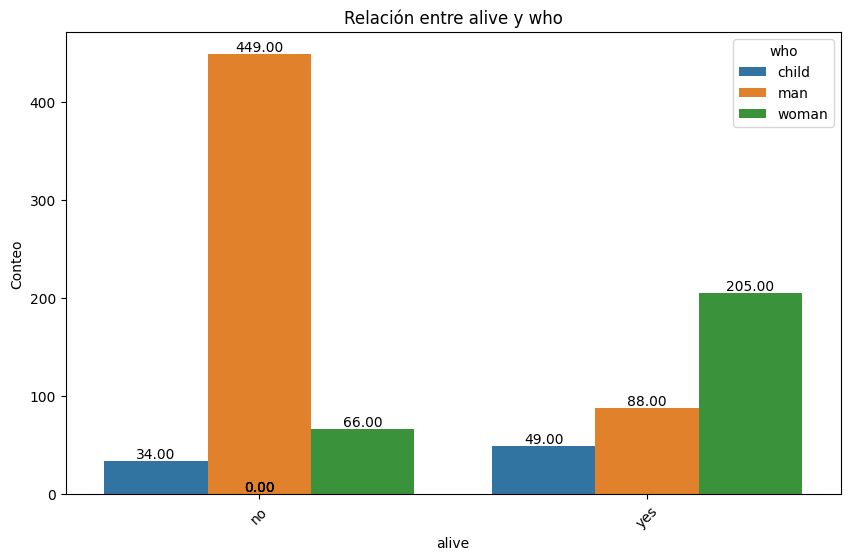

In [21]:
plot_categorical_relationship_fin(df_titanic, "alive", "who", show_values = True)

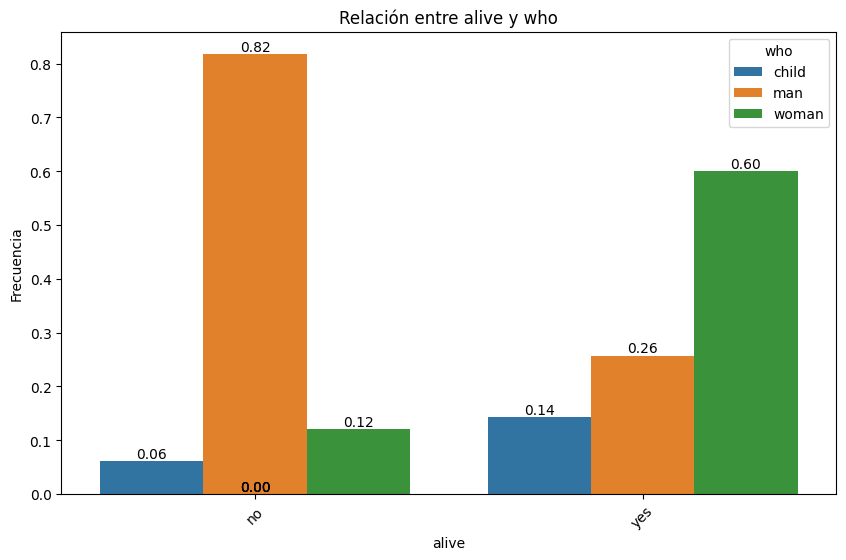

In [22]:
plot_categorical_relationship_fin(df_titanic, "alive", "who", relative_freq = True, show_values = True)

In [28]:
from scipy.stats import chi2_contingency

tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["sex"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 260.71702016732104
P-Value: 1.1973570627755645e-58
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[193.47474747 355.52525253]
 [120.52525253 221.47474747]]


In [27]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["who"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


Tanto en términos absolutos como relativos sobrevivieron bastantes más mujeres y menos niños. Comos el test Chi-Cuadrado nos da p-valores muy pequeños, menor que 0.05, podemos rechazar las hipótesis nula de que las variables sean independientes. Por tanto, hay una relación estadísticamente significativa entre el sexo y la supervivencia, y entre ser adulto o ser niño.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

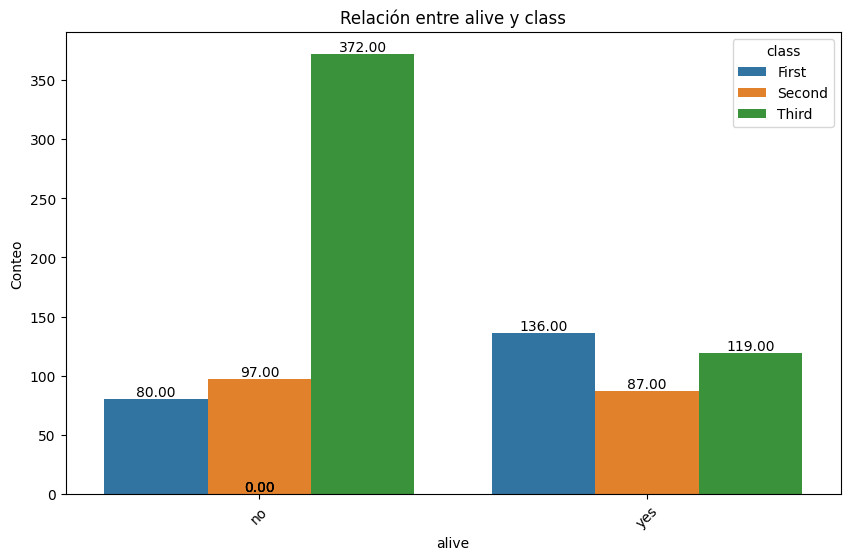

In [29]:
plot_categorical_relationship_fin(df_titanic, "alive", "class", show_values = True)

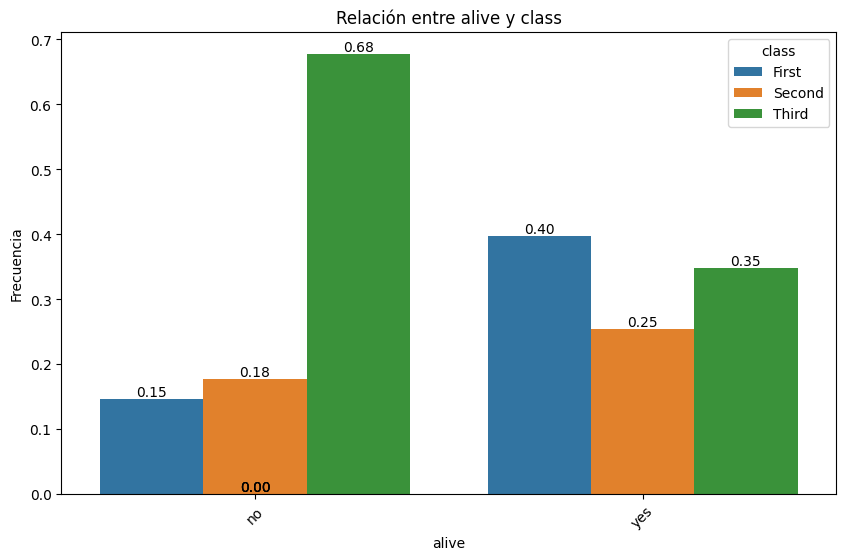

In [30]:
plot_categorical_relationship_fin(df_titanic, "alive", "class", relative_freq = True, show_values = True)

In [31]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["class"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


Sobrevivieron más pasajeros de primera clase, y luego de segunda. Como el p-valor es menor que 0.05, podemos afirmar con cierta confianza que existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia.

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido

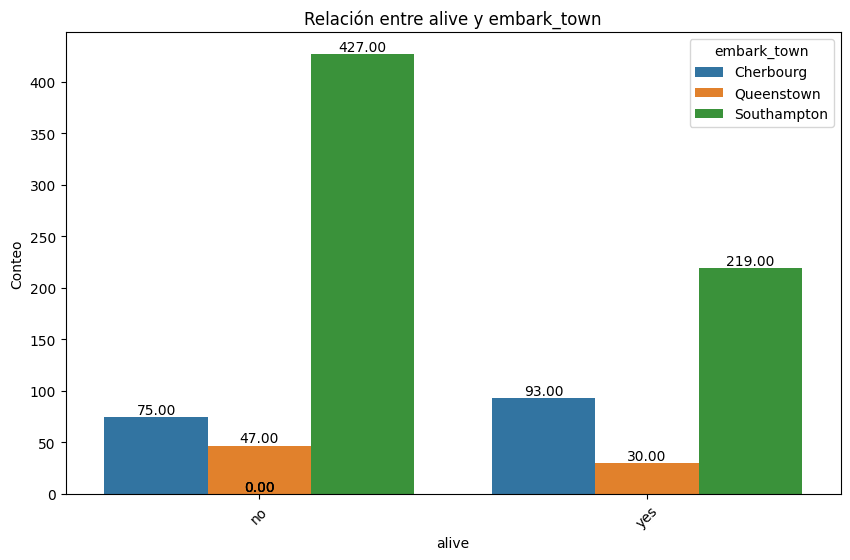

In [32]:
plot_categorical_relationship_fin(df_titanic, "alive", "embark_town", show_values = True)

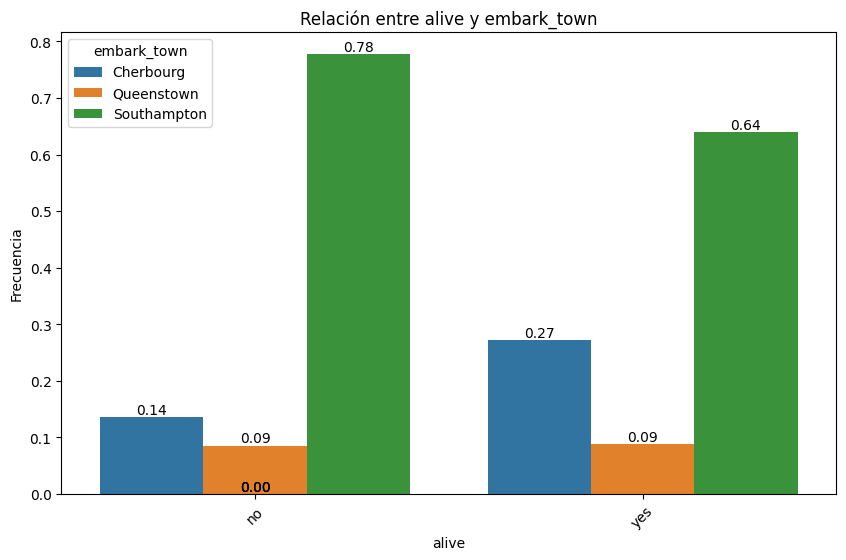

In [34]:
plot_categorical_relationship_fin(df_titanic, "alive", "embark_town", relative_freq = True, show_values = True)

In [35]:
tabla_contingencia = pd.crosstab(df_titanic["alive"], df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)

print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  47.44444444 398.04040404]
 [ 64.48484848  29.55555556 247.95959596]]


De Southampton sobrevivieron más personas y porcentualmente también. De nuevo sí hay relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido.

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

In [43]:
# Aplico la prueba U de Mann-Whitney:
from scipy.stats import mannwhitneyu

grupo_supervivientes = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_fallecidos = df_titanic.loc[df_titanic.alive == "no"]["fare"]

u_stat, p_valor = mannwhitneyu(grupo_supervivientes, grupo_fallecidos)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


En este caso la hipótesis nula es que no hay diferencia estadística significativa entre las medianas de los valores, como el p-valor es menor que 0.05, rechazamos la hipótesis nula.

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [44]:
df_titanic.loc[df_titanic["fare"] == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [48]:
df_titanic.loc[df_titanic["fare"].idxmax()]

sex                  female
age                    35.0
fare               512.3292
class                 First
who                   woman
adult_male            False
embark_town       Cherbourg
alive                   yes
alone                  True
family_members            0
Name: 258, dtype: object

Ninguno es niño ni va acompañado. Una posibilidad es que sean parte de la tripulación y que aparezcan como pasajeros. 

La persona que más dinero se dejó viajaba en primera clase y sobrevivió. Embarcó en Cherbourg y no en Southampton.

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

In [50]:
df_titanic.groupby(["embark_town", "alive"])["fare"].describe()

count       mean        std     min      25%       50%  \
embark_town alive                                                           
Cherbourg   no      75.0  35.443335  49.617218  4.0125   7.2292  14.45830   
            yes     93.0  79.720926  99.582717  7.2250  19.2583  56.92920   
Queenstown  no      47.0  13.335904  13.550636  6.7500   7.7500   7.75000   
            yes     30.0  13.182227  15.371167  7.7333   7.7500   7.80835   
Southampton no     427.0  20.743987  27.896824  0.0000   7.8958  10.50000   
            yes    219.0  39.916514  45.383008  0.0000  12.8250  26.00000   

                       75%       max  
embark_town alive                     
Cherbourg   no     32.6750  247.5208  
            yes    89.1042  512.3292  
Queenstown  no     15.5000   90.0000  
            yes    12.3500   90.0000  
Southampton no     26.0000  263.0000  
            yes    52.2771  263.0000

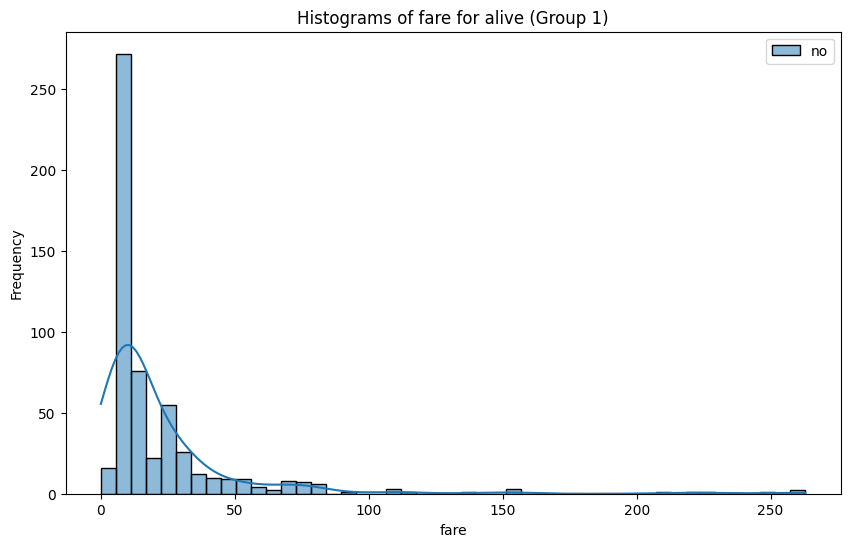

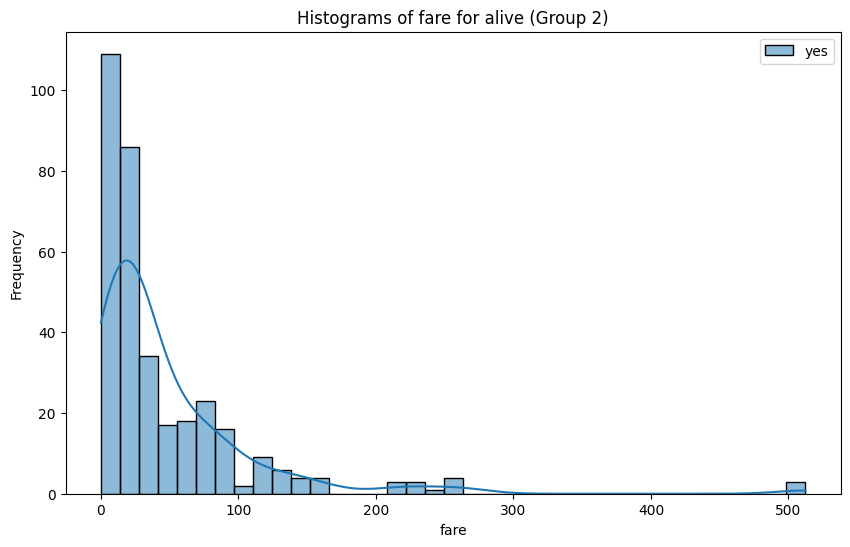

In [53]:
plot_grouped_histograms(df_titanic, "alive", "fare", group_size = 1)

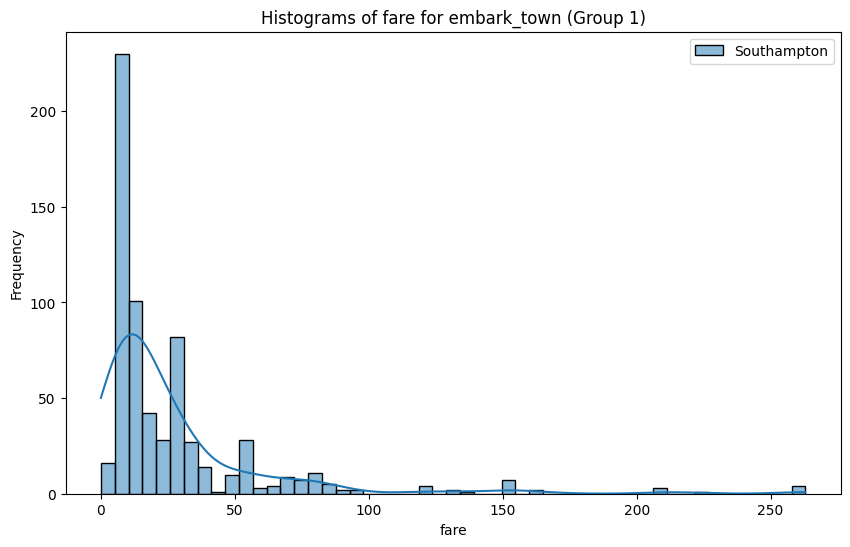

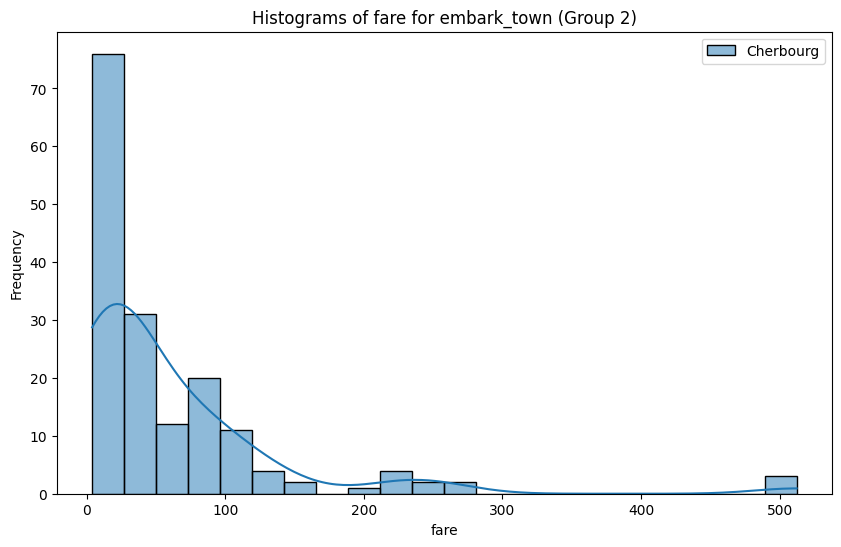

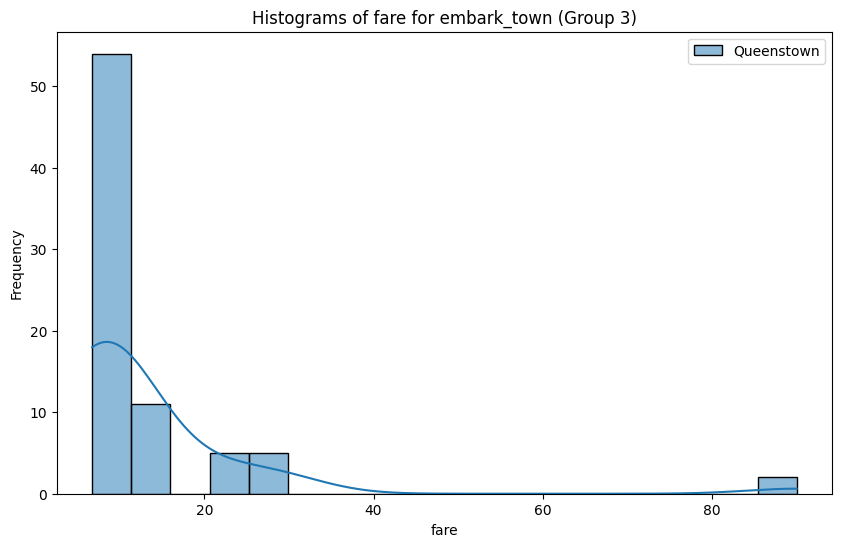

In [54]:
plot_grouped_histograms(df_titanic, "embark_town", "fare", group_size = 1)

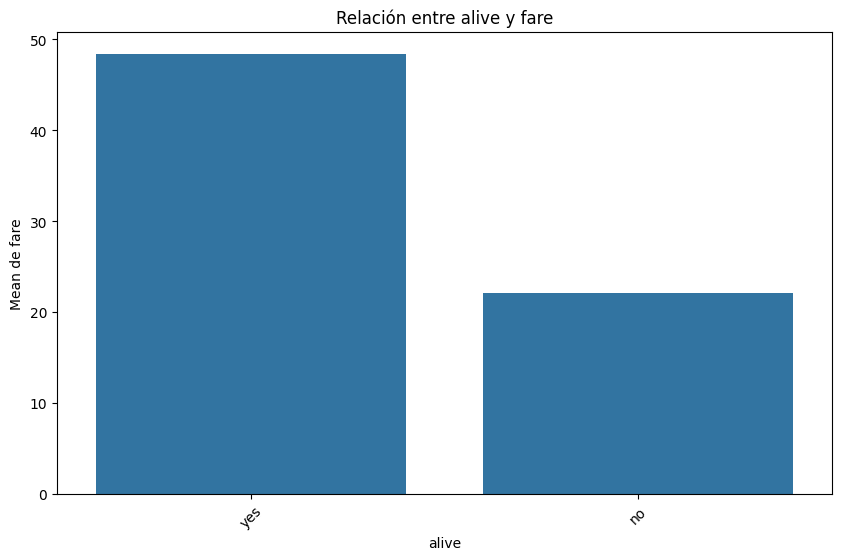

In [55]:
plot_categorical_numerical_relationship(df_titanic, "alive", "fare")

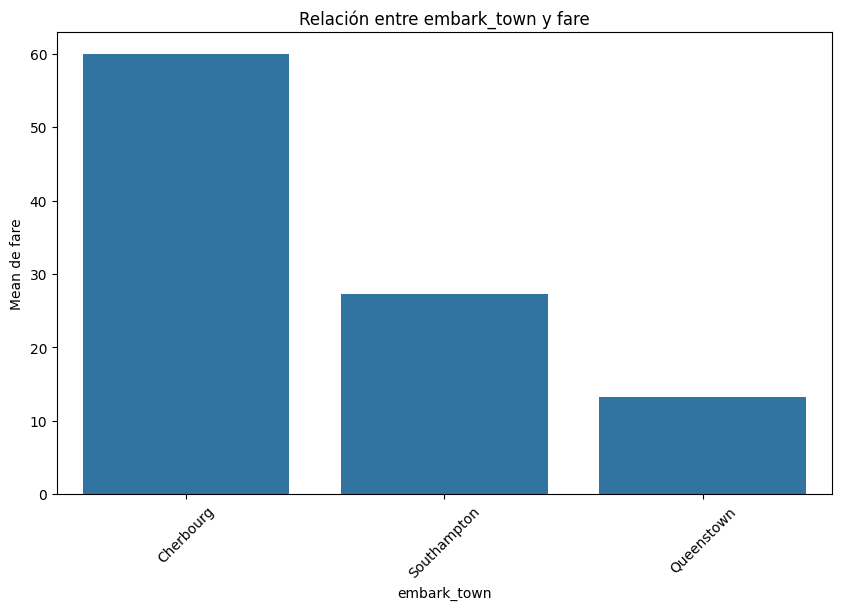

In [56]:
plot_categorical_numerical_relationship(df_titanic, "embark_town", "fare")

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

In [71]:
df_titanic.loc[df_titanic.alive == "yes"].groupby(["class", "age"]).size().sort_values(ascending = False)

class  age      
Third  32.000000    30
First  32.000000    11
Third  33.173123     9
First  35.000000     9
       36.000000     7
                    ..
Third  38.000000     1
       39.000000     1
       44.000000     1
       45.000000     1
       63.000000     1
Length: 128, dtype: int64

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

(2, 2)


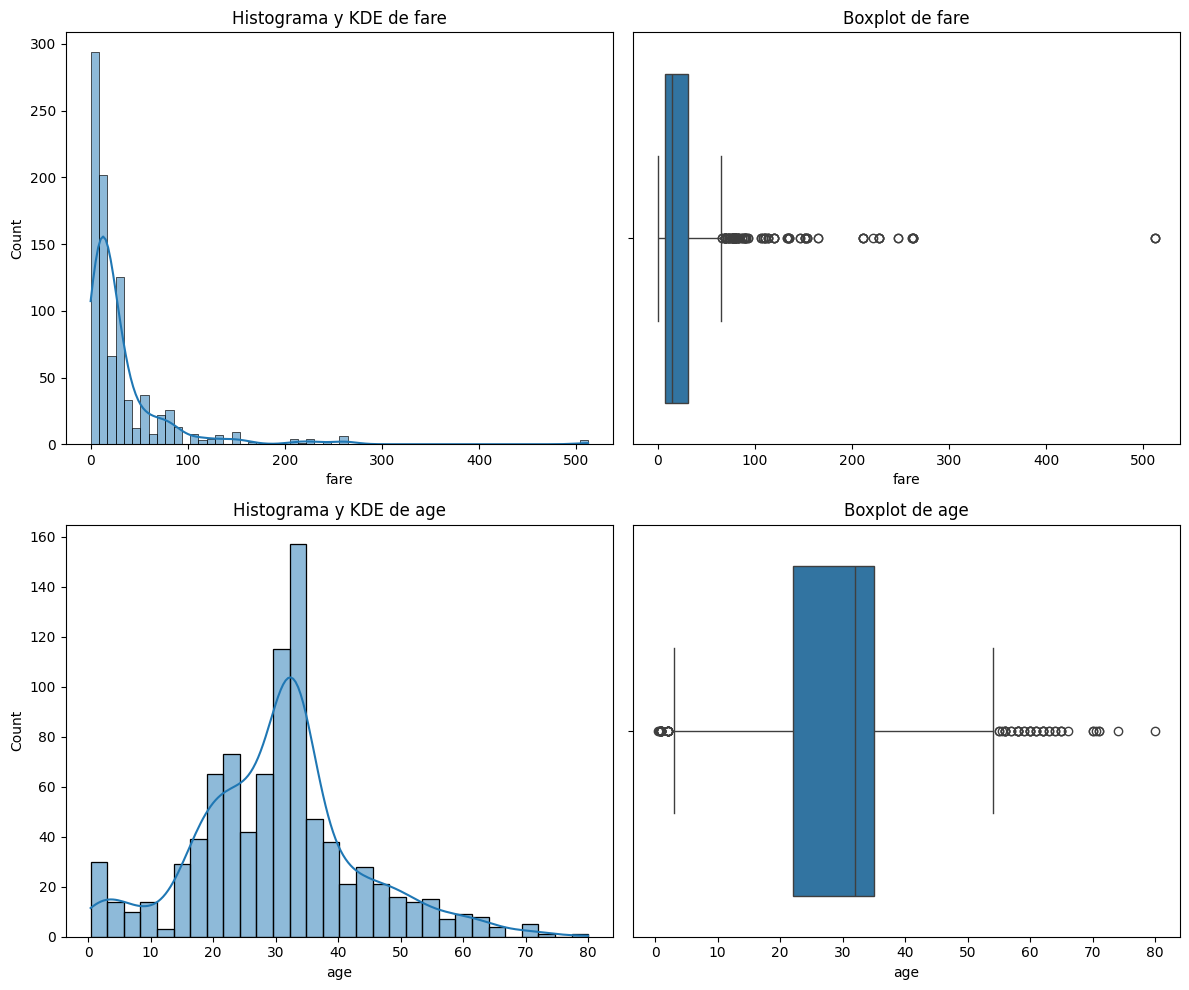

In [80]:
plot_combined_graphs(df_titanic, ["fare", "age"])

## #EXTRA: Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #EXTRA.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

### #EXTRA.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

### #EXTRA.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?